In [20]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_y_bar_equal(S):
    alpha_s = (1/S)
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.sum(y_s * alpha_s)

def calculate_sigma_equal(S,y_bar):
    alpha_s = (1/S)
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.sum((y_s - y_bar)**2 * alpha_s)

def calculate_eta_equal(i, S, y_bar):
    alpha_i =(1/S)
    y_i = i - 1
    return alpha_i * (y_i - y_bar)

def create_matrix_equal(n, S):
    y_bar = calculate_y_bar_equal(S)
    sigma = calculate_sigma_equal(S,y_bar)
    matrix = np.zeros((n+1, n+1))
    matrix[0, 0] = sigma
    
    for i in range(1, n+1):
        eta_i = calculate_eta_equal(i, S, y_bar)
        matrix[0, i] = eta_i
        matrix[i, 0] = eta_i
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            alpha_i = (1/S) 
            alpha_j = (1/S)
            if i == j:
                matrix[i, j] = alpha_i * (1 - alpha_i)
            else:
                matrix[i, j] = -alpha_i * alpha_j
    
    return matrix

results = []

S = 51

for n in range(0, 36):
    matrix = create_matrix_equal(n, S)          # Create the matrix
    
    # Calculate the inverse of the matrix
    try:
        inv_matrix_equal = np.linalg.inv(matrix)
        inv_00_element_equal = inv_matrix_equal[0, 0]
    except np.linalg.LinAlgError:
        inv_00_element_equal = "Not invertible"
    
    
    results.append((n, inv_00_element_equal))   # Append results

with open("n_vs_v_inv_equal.txt", "w") as file:
    for n, inv_00 in results:
        print(f"n = {n}, Inverse[0,0] = {inv_00}")
        file.write(f"n = {n}, Inverse[0,0] = {inv_00}\n")    

n = 0, Inverse[0,0] = 0.004615384615384616
n = 1, Inverse[0,0] = 0.00489795918367347
n = 2, Inverse[0,0] = 0.005204081632653062
n = 3, Inverse[0,0] = 0.005536257056013896
n = 4, Inverse[0,0] = 0.0058973172987974104
n = 5, Inverse[0,0] = 0.006290471785383905
n = 6, Inverse[0,0] = 0.006719367588932807
n = 7, Inverse[0,0] = 0.007188160676532771
n = 8, Inverse[0,0] = 0.007701600724856541
n = 9, Inverse[0,0] = 0.008265132485211896
n = 10, Inverse[0,0] = 0.008885017421602791
n = 11, Inverse[0,0] = 0.009568480300187619
n = 12, Inverse[0,0] = 0.010323886639676117
n = 13, Inverse[0,0] = 0.011160958529379584
n = 14, Inverse[0,0] = 0.01209103840682788
n = 15, Inverse[0,0] = 0.013127413127413133
n = 16, Inverse[0,0] = 0.014285714285714294
n = 17, Inverse[0,0] = 0.015584415584415593
n = 18, Inverse[0,0] = 0.017045454545454555
n = 19, Inverse[0,0] = 0.01869501466275661
n = 20, Inverse[0,0] = 0.020564516129032272
n = 21, Inverse[0,0] = 0.022691879866518366
n = 22, Inverse[0,0] = 0.025123152709359626


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

def C(x,y):
    return math.comb(x,y)

def calculate_y_bar_binomial(S,p):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.dot(np.transpose(y_s), alpha_s)

def calculate_sigma_binomial(S,p, y_bar):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.sum((y_s - y_bar)**2 * alpha_s)

def calculate_eta_binomial(i, S, p, y_bar):
    alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
    y_i = i - 1
    return alpha_i * (y_i - y_bar)

def create_matrix_binomial(n, p, S):
    y_bar = calculate_y_bar_binomial(S,p)
    sigma = calculate_sigma_binomial(S,p, y_bar)
    matrix = np.zeros((n+1, n+1))
    matrix[0, 0] = sigma
    
    for i in range(1, n+1):
        eta_i = calculate_eta_binomial(i, S, p, y_bar)
        matrix[0, i] = eta_i
        matrix[i, 0] = eta_i
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
            alpha_j = p**j * (1-p)**(S-j) * C(S, j)+ (1/S) * (1-p)**S
            if i == j:
                matrix[i, j] = alpha_i * (1 - alpha_i)
            else:
                matrix[i, j] = -alpha_i * alpha_j
    
    return matrix

#print(create_matrix_binomial(1, 0.5, 10))
results = []

S = 51
p=0.5

for n in range(0, 36):
    matrix = create_matrix_binomial(n, p, S)          # Create the matrix
    
    # Calculate the inverse of the matrix
    try:
        inv_matrix_binomial= np.linalg.inv(matrix)
        inv_00_element_binomial = inv_matrix_binomial[0, 0]
    except np.linalg.LinAlgError:
        inv_00_element_binomial = "Not invertible"
    
    
    results.append((n, inv_00_element_binomial))   # Append results


# Print results
#for n, inv_00 in results:
#    print(f"n = {n}, Inverse[0,0] = {inv_00}")

with open("n_vs_v_inv_binomial.txt", "w") as file:
    for n, inv_00 in results:
        print(f"n = {n}, Inverse[0,0] = {inv_00}")
        file.write(f"n = {n}, Inverse[0,0] = {inv_00}\n")    

n = 0, Inverse[0,0] = 0.07843137254902079
n = 1, Inverse[0,0] = 0.07843137254910446
n = 2, Inverse[0,0] = 0.078431372551028
n = 3, Inverse[0,0] = 0.07843137257982853
n = 4, Inverse[0,0] = 0.07843137289539662
n = 5, Inverse[0,0] = 0.07843137559221504
n = 6, Inverse[0,0] = 0.07843139429989394
n = 7, Inverse[0,0] = 0.07843150254526766
n = 8, Inverse[0,0] = 0.07843203527676118
n = 9, Inverse[0,0] = 0.07843429805667997
n = 10, Inverse[0,0] = 0.07844268587919562
n = 11, Inverse[0,0] = 0.07847005892196945
n = 12, Inverse[0,0] = 0.0785492661313921
n = 13, Inverse[0,0] = 0.0787537859919913
n = 14, Inverse[0,0] = 0.07922810382711103
n = 15, Inverse[0,0] = 0.08022382231335959
n = 16, Inverse[0,0] = 0.0821348315960491
n = 17, Inverse[0,0] = 0.08553072332484099
n = 18, Inverse[0,0] = 0.09120356975466944
n = 19, Inverse[0,0] = 0.10026246566002203
n = 20, Inverse[0,0] = 0.11432792796497367
n = 21, Inverse[0,0] = 0.13590433328728865
n = 22, Inverse[0,0] = 0.16907001213196857
n = 23, Inverse[0,0] = 0.2

/var/folders/l_/1vjbdzb93s15yn8xfv9ntcjr0000gn/T/ipykernel_52552/3307244666.py:50: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


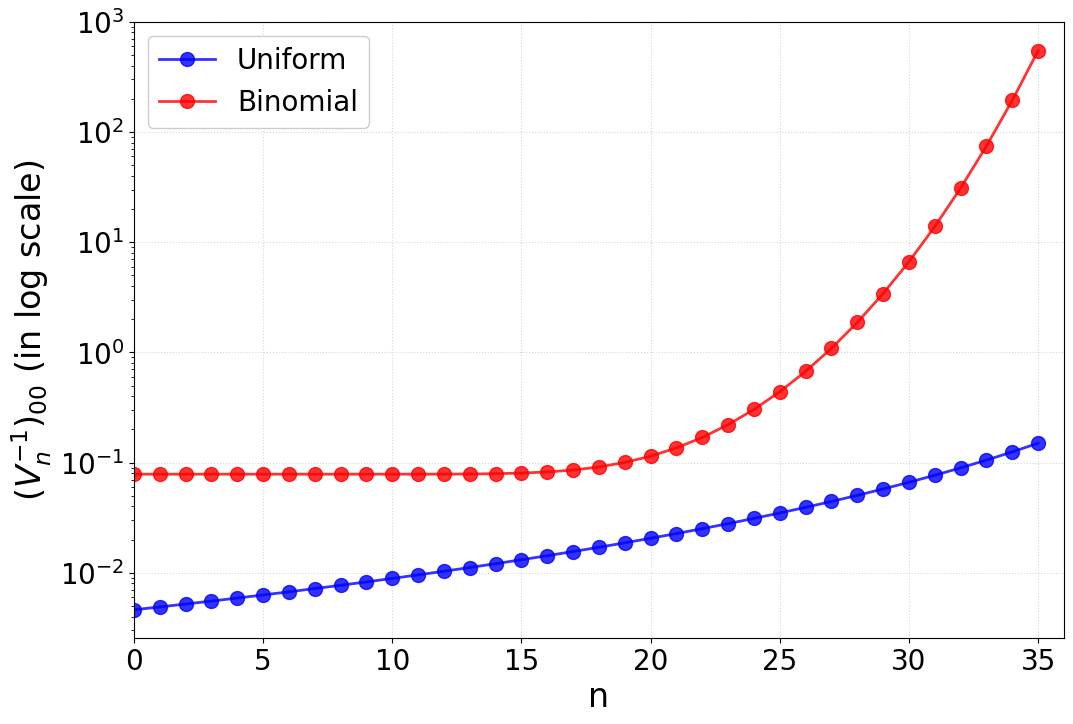

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(filename):
    n_values = []
    inv_values = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.split('=')
            if len(parts) >= 2:
                try:
                    n = int(parts[1].split(',')[0].strip())
                    inv_str = parts[-1].strip()
                    if inv_str != "Not invertible":
                        inv = float(inv_str)
                        n_values.append(n)
                        inv_values.append(inv)
                except ValueError:
                    print(f"Skipping line: {line.strip()}")
    return n_values, inv_values

# Read data from both files
n_equal, inv_equal = read_data("n_vs_v_inv_equal.txt")
n_binomial, inv_binomial = read_data("n_vs_v_inv_binomial.txt")

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(n_equal, inv_equal, 'o-', color='blue', linewidth=2, alpha=0.8, markersize=10, label='Uniform')
plt.plot(n_binomial, inv_binomial, 'o-', color='red', linewidth=2, alpha=0.8, markersize=10, label='Binomial')


legend = plt.legend(
    fontsize=20,             
    frameon=True,            # Draw a box around the legend
    fancybox=True,           # Use a fancy box
    framealpha=1.0           # Transparency of the legend box
)


# Add grid
plt.grid(True, linestyle=':', alpha=0.5)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,36)
plt.xlabel('n', fontsize=24)
plt.ylabel(r'$(V^{-1}_n)_{00}$ (in log scale)', fontsize=24)
plt.yscale('log')
plt.ylim(0, 1000)
plt.savefig('n_vs_v_inv_comparison.jpg', dpi=300, bbox_inches='tight')
plt.show()
